## 1. Y Data Mapping

recode & mapping GDELT events into text

http://data.gdeltproject.org/documentation/GDELT-Data_Format_Codebook.pdf

http://data.gdeltproject.org/documentation/CAMEO.Manual.1.1b3.pdf


In [4]:
import pandas as pd

In [5]:
df_y = pd.read_csv("gdelt_events_all.csv", low_memory=False)

# Convert SQLDATE → datetime
df_y["SQLDATE"] = pd.to_datetime(df_y["SQLDATE"], format="%Y%m%d", errors="coerce")
df_y = df_y.dropna(subset=["SQLDATE"])

In [3]:
df_y.head()

,GLOBALEVENTID,SQLDATE,MonthYear,Year,FractionDate,Actor1Code,Actor1Name,Actor1CountryCode,Actor1KnownGroupCode,Actor1EthnicCode,...,Actor2Geo_FeatureID,ActionGeo_Type,ActionGeo_FullName,ActionGeo_CountryCode,ActionGeo_ADM1Code,ActionGeo_Lat,ActionGeo_Long,ActionGeo_FeatureID,DATEADDED,SOURCEURL
0,1037833059,2022-04-05,202204,2022,2022.2603,CHN,CHINA,CHN,NaN,NaN,...,CH,1.0,China,CH,CH,35.0000,105.000000,CH,20220405.0,https://www.worldtrademarkreview.com/chile-joi...
1,492140887,2015-12-08,201512,2015,2015.9260,CHNGOV,LI KEQIANG,CHN,NaN,NaN,...,-74897,4.0,"Belgrade, Serbia (general),",RB,RB00,44.8186,20.468100,-74897,20151208.0,http://www.skyscrapercity.com/showthread.php?p...
2,418820936,2015-03-20,201503,2015,2015.2192,USA,UNITED STATES,USA,NaN,NaN,...,-2601889,4.0,"London, London, City of, United Kingdom",UK,UKH9,51.5000,-0.116667,-2601889,20150320.0,http://www.huffingtonpost.co.uk/daniellewood/b...
3,279979914,2013-12-17,201312,2013,2013.9507,USA,THE US,USA,NaN,NaN,...,-1898541,4.0,"Beijing, Beijing, China",CH,CH22,39.9289,116.388000,-1898541,20131217.0,http://www.wsws.org/en/articles/2013/12/18/ind...
4,470386368,2015-09-26,201509,2015,2015.7288,MNCUSA,HEWLETT PACKARD,USA,NaN,NaN,...,CH,1.0,China,CH,CH,35.0000,105.000000,CH,20150926.0,http://globegazette.com/news/iowa/fiorina-says...


In [6]:
'''
recode event root code
'''

event_root_map = {
    1:  "Make Public Statement",
    2:  "Appeal",
    3:  "Express Intent to Cooperate",
    4:  "Consult",
    5:  "Engage in Diplomatic Cooperation",
    6:  "Engage in Material Cooperation",
    7:  "Provide Aid",
    8:  "Yield",
    9:  "Investigate",
    10: "Demand",
    11: "Disapprove",
    12: "Reject",
    13: "Threaten",
    14: "Protest",
    15: "Exhibit Force Posture",
    16: "Reduce Relations",
    17: "Coerce",
    18: "Assault",
    19: "Fight",
    20: "Use Unconventional Mass Violence"
}

df_y["event_root_text"] = df_y["EventRootCode"].map(event_root_map)

In [7]:
quadclass_map = {
    1: "Verbal Cooperation",
    2: "Material Cooperation",
    3: "Verbal Conflict",
    4: "Material Conflict"
}

df_y["quadclass_text"] = df_y["QuadClass"].map(quadclass_map)


In [8]:
cameo_event_map = {
    # 01: Public Statement
    "010": "Make statement, not specified below",
    "011": "Decline comment",
    "012": "Make pessimistic comment",
    "013": "Make optimistic comment",
    "014": "Consider policy option",
    "015": "Acknowledge or claim responsibility",
    "016": "Deny responsibility",
    "017": "Engage in symbolic act",
    "018": "Make empathetic comment",
    "019": "Express accord",

    # 02: Appeal
    "020": "Make an appeal or request, n.s.",
    "021": "Appeal for material cooperation",
    "0211": "Appeal for economic cooperation",
    "0212": "Appeal for military cooperation",
    "0213": "Appeal for judicial cooperation",
    "0214": "Appeal for intelligence cooperation",
    "022": "Appeal for diplomatic cooperation",
    "023": "Appeal for aid",
    "0231": "Appeal for economic aid",
    "0232": "Appeal for military aid",
    "0233": "Appeal for humanitarian aid",
    "0234": "Appeal for military protection",
    "024": "Appeal for political reform",
    "0241": "Appeal for leadership change",
    "0242": "Appeal for policy change",
    "0243": "Appeal for rights",
    "0244": "Appeal for institutional / regime change",
    "025": "Appeal to yield",
    "0251": "Appeal for easing administrative sanctions",
    "0252": "Appeal for easing political dissent",
    "0253": "Appeal for release of persons or property",
    "0254": "Appeal to ease economic sanctions",
    "0255": "Appeal to allow international involvement",
    "0256": "Appeal to de-escalate military engagement",
    "026": "Appeal to meet or negotiate",
    "027": "Appeal to settle dispute",
    "028": "Appeal to accept mediation",

    # 03: Express Intent to Cooperate
    "030": "Express intent to cooperate",
    "031": "Express intent for material cooperation",
    "0311": "Express intent for economic cooperation",
    "0312": "Express intent for military cooperation",
    "0313": "Express intent for judicial cooperation",
    "0314": "Express intent for intelligence cooperation",
    "032": "Express intent for diplomatic cooperation",
    "033": "Express intent to provide aid",
    "0331": "Express intent to provide economic aid",
    "0332": "Express intent to provide military aid",
    "0333": "Express intent to provide humanitarian aid",
    "0334": "Express intent to provide military protection",
    "034": "Express intent for political reform",
    "0341": "Express intent for leadership change",
    "0342": "Express intent for policy change",
    "0343": "Express intent for rights",
    "0344": "Express intent for institutional / regime change",
    "035": "Express intent to yield",
    "0351": "Express intent to ease administrative sanctions",
    "0352": "Express intent to ease dissent",
    "0353": "Express intent to release persons / property",
    "0354": "Express intent to ease economic sanctions",
    "0355": "Express intent to allow international involvement",
    "0356": "Express intent to de-escalate military engagement",
    "036": "Express intent to meet / negotiate",
    "037": "Express intent to settle dispute",
    "038": "Express intent to accept mediation",
    "039": "Express intent to mediate",

    # 04: Consult
    "040": "Consult",
    "041": "Discuss by telephone",
    "042": "Make a visit",
    "043": "Host a visit",
    "044": "Meet at third location",
    "045": "Mediate",
    "046": "Engage in negotiation",

    # 05: Diplomatic Cooperation
    "050": "Engage in diplomatic cooperation",
    "051": "Praise or endorse",
    "052": "Defend verbally",
    "053": "Rally support",
    "054": "Grant diplomatic recognition",
    "055": "Apologize",
    "056": "Forgive",
    "057": "Sign agreement",

    # 06: Material Cooperation
    "060": "Engage in material cooperation",
    "061": "Cooperate economically",
    "062": "Cooperate militarily",
    "063": "Engage in judicial cooperation",
    "064": "Share intelligence",

    # 07: Provide Aid
    "070": "Provide aid",
    "071": "Provide economic aid",
    "072": "Provide military aid",
    "073": "Provide humanitarian aid",
    "074": "Provide military protection",
    "075": "Grant asylum",

    # 08: Yield
    "080": "Yield",
    "081": "Ease administrative sanctions",
    "0811": "Ease political freedoms restrictions",
    "0812": "Ease ban on political parties",
    "0813": "Ease curfew",
    "0814": "Ease state of emergency",
    "082": "Ease political dissent",
    "083": "Accede to political reform demands",
    "0831": "Accede to leadership change",
    "0832": "Accede to policy change",
    "0833": "Accede to rights",
    "0834": "Accede to institutional change",
    "084": "Return or release",
    "0841": "Release persons",
    "0842": "Return property",
    "085": "Ease economic sanctions",
    "086": "Allow international involvement",
    "0861": "Receive peacekeepers",
    "0862": "Receive inspectors",
    "0863": "Allow humanitarian access",
    "087": "De-escalate military engagement",
    "0871": "Declare truce",
    "0872": "Ease blockade",
    "0873": "Demobilize forces",
    "0874": "Retreat or surrender",

    # 09: Investigate
    "090": "Investigate",
    "091": "Investigate crime",
    "092": "Investigate human rights abuses",
    "093": "Investigate military action",
    "094": "Investigate war crimes",

    # 10: Demand
    "100": "Demand",
    "101": "Demand material cooperation",
    "1011": "Demand economic cooperation",
    "1012": "Demand military cooperation",
    "1013": "Demand judicial cooperation",
    "1014": "Demand intelligence cooperation",
    "102": "Demand diplomatic cooperation",
    "103": "Demand aid",
    "1031": "Demand economic aid",
    "1032": "Demand military aid",
    "1033": "Demand humanitarian aid",
    "1034": "Demand military protection",
    "104": "Demand political reform",
    "1041": "Demand leadership change",
    "1042": "Demand policy change",
    "1043": "Demand rights",
    "1044": "Demand institutional change",
    "105": "Demand yielding",
    "1051": "Demand easing administrative sanctions",
    "1052": "Demand easing political dissent",
    "1053": "Demand release of persons / property",
    "1054": "Demand easing economic sanctions",
    "1055": "Demand allowing international involvement",
    "1056": "Demand de-escalation",
    "106": "Demand meeting",
    "107": "Demand settling dispute",
    "108": "Demand mediation",

    # 11: Disapprove
    "110": "Disapprove",
    "111": "Criticize or denounce",
    "112": "Accuse",
    "1121": "Accuse crime",
    "1122": "Accuse human rights abuses",
    "1123": "Accuse aggression",
    "1124": "Accuse war crimes",
    "1125": "Accuse espionage",
    "113": "Rally opposition",
    "114": "Complain officially",
    "115": "Bring lawsuit",
    "116": "Find guilty",

    # 12: Reject
    "120": "Reject",
    "121": "Reject material cooperation",
    "1211": "Reject economic cooperation",
    "1212": "Reject military cooperation",
    "122": "Reject request for aid",
    "1221": "Reject economic aid",
    "1222": "Reject military aid",
    "1223": "Reject humanitarian aid",
    "1224": "Reject military protection",
    "123": "Reject political reform",
    "1231": "Reject leadership change",
    "1232": "Reject policy change",
    "1233": "Reject rights",
    "1234": "Reject institutional change",
    "124": "Refuse to yield",
    "1241": "Refuse easing administrative sanctions",
    "1242": "Refuse easing dissent",
    "1243": "Refuse release",
    "1244": "Refuse easing economic sanctions",
    "1245": "Refuse international involvement",
    "1246": "Refuse de-escalation",
    "125": "Reject meeting",
    "126": "Reject mediation",
    "127": "Reject settlement plan",
    "128": "Defy norms or law",
    "129": "Veto",

    # 13: Threaten
    "130": "Threaten",
    "131": "Threaten non-force",
    "1311": "Threaten reducing aid",
    "1312": "Threaten sanctions",
    "1313": "Threaten reducing relations",
    "132": "Threaten administrative sanctions",
    "1321": "Threaten restricting freedoms",
    "1322": "Threaten banning political parties",
    "1323": "Threaten curfew",
    "1324": "Threaten state of emergency",
    "133": "Threaten protest",
    "134": "Threaten to halt negotiations",
    "135": "Threaten to halt mediation",
    "136": "Threaten to halt international involvement",
    "137": "Threaten with repression",
    "138": "Threaten military force",
    "1381": "Threaten blockade",
    "1382": "Threaten occupation",
    "1383": "Threaten unconventional violence",
    "1384": "Threaten conventional attack",
    "1385": "Threaten WMD attack",
    "139": "Give ultimatum",

    # 14: Protest
    "140": "Protest",
    "141": "Demonstrate or rally",
    "1411": "Demonstrate for leadership change",
    "1412": "Demonstrate for policy change",
    "1413": "Demonstrate for rights",
    "1414": "Demonstrate for institutional change",
    "142": "Hunger strike",
    "1421": "Hunger strike for leadership change",
    "1422": "Hunger strike for policy change",
    "1423": "Hunger strike for rights",
    "1424": "Hunger strike for institutional change",
    "143": "Strike or boycott",
    "1431": "Strike for leadership change",
    "1432": "Strike for policy change",
    "1433": "Strike for rights",
    "1434": "Strike for institutional change",
    "144": "Obstruct passage",
    "1441": "Obstruct for leadership change",
    "1442": "Obstruct for policy change",
    "1443": "Obstruct for rights",
    "1444": "Obstruct for institutional change",
    "145": "Violent protest or riot",
    "1451": "Violent protest for leadership change",
    "1452": "Violent protest for policy change",
    "1453": "Violent protest for rights",
    "1454": "Violent protest for institutional change",

    # 15: Force Posture
    "150": "Demonstrate military/police power",
    "151": "Increase police alert",
    "152": "Increase military alert",
    "153": "Mobilize police",
    "154": "Mobilize armed forces",
    "155": "Mobilize cyber forces",

    # 16: Reduce Relations
    "160": "Reduce relations",
    "161": "Break diplomatic relations",
    "162": "Reduce material aid",
    "1621": "Reduce economic aid",
    "1622": "Reduce military aid",
    "1623": "Reduce humanitarian aid",
    "163": "Impose sanctions",
    "164": "Halt negotiations",
    "165": "Halt mediation",
    "166": "Expel or withdraw",
    "1661": "Expel peacekeepers",
    "1662": "Expel inspectors",
    "1663": "Expel aid agencies",

    # 17: Coerce
    "170": "Coerce",
    "171": "Seize or damage property",
    "1711": "Confiscate property",
    "1712": "Destroy property",
    "172": "Impose administrative sanctions",
    "1721": "Restrict political freedoms",
    "1722": "Ban political parties",
    "1723": "Impose curfew",
    "1724": "Impose state of emergency",
    "173": "Arrest, detain",
    "174": "Expel or deport individuals",
    "175": "Violent repression",
    "176": "Cyber attack",

    # 18: Assault
    "180": "Use unconventional violence",
    "181": "Abduct or hostage-taking",
    "182": "Physical assault",
    "1821": "Sexual assault",
    "1822": "Torture",
    "1823": "Kill by physical assault",
    "183": "Non-military bombing",
    "1831": "Suicide bombing",
    "1832": "Vehicular bombing",
    "1833": "Roadside bombing",
    "1834": "Location bombing",
    "184": "Use as human shield",
    "185": "Attempt to assassinate",
    "186": "Assassinate",

    # 19: Fight
    "190": "Use conventional military force",
    "191": "Impose blockade",
    "192": "Occupy territory",
    "193": "Attack with small arms",
    "194": "Use artillery/tanks",
    "195": "Employ aerial weapons",
    "1951": "Precision-guided airstrike",
    "1952": "Drone strike",
    "196": "Violate ceasefire",

    # 20: WMD / Mass Violence
    "200": "Use unconventional mass violence",
    "201": "Mass expulsion",
    "202": "Mass killings",
    "203": "Ethnic cleansing",
    "204": "Use WMD",
    "2041": "Use chemical/biological/radiological weapons",
    "2042": "Detonate nuclear weapons"
}



In [9]:
df_y["EventCode_str"] = df_y["EventCode"].astype(str).str.zfill(3)
df_y["event_text"] = df_y["EventCode_str"].map(cameo_event_map)

In [11]:
df_y_sorted = df_y.sort_values('SQLDATE').copy()
df_y_sorted['date'] = df_y_sorted['SQLDATE'].dt.strftime('%Y-%m-%d')
df_y_sorted.head()

,GLOBALEVENTID,SQLDATE,MonthYear,Year,FractionDate,Actor1Code,Actor1Name,Actor1CountryCode,Actor1KnownGroupCode,Actor1EthnicCode,...,ActionGeo_Lat,ActionGeo_Long,ActionGeo_FeatureID,DATEADDED,SOURCEURL,event_root_text,quadclass_text,EventCode_str,event_text,date
678022,112175266,2011-01-01,201101,2011,2011.0027,CHN,CHINA,CHN,NaN,NaN,...,42.1497,-74.9384,0,20130203.0,unspecified,Fight,Material Conflict,190,Use conventional military force,2011-01-01
42955,112175260,2011-01-01,201101,2011,2011.0027,CHN,CHINA,CHN,NaN,NaN,...,39.9289,116.3880,NaN,20130203.0,unspecified,Disapprove,Verbal Conflict,110,Disapprove,2011-01-01
785455,112203432,2011-01-01,201101,2011,2011.0027,USA,UNITED STATES,USA,NaN,NaN,...,-41.0000,174.0000,0,20130203.0,unspecified,Fight,Material Conflict,190,Use conventional military force,2011-01-01
103517,112175271,2011-01-01,201101,2011,2011.0027,CHN,BEIJING,CHN,NaN,NaN,...,39.9289,116.3880,-1898541,20130203.0,unspecified,Fight,Material Conflict,190,Use conventional military force,2011-01-01
425711,112193732,2011-01-01,201101,2011,2011.0027,MNCUSAMED,GOOGLE,USA,NaN,NaN,...,35.0000,105.0000,0,20130203.0,unspecified,Investigate,Material Cooperation,090,Investigate,2011-01-01


In [12]:
df_y_sorted.to_csv("daily_events.csv", index=False)

## 1.2 Event-level data aggreagte into daily level

In [15]:
daily_counts = (
    df_y_sorted.groupby(["date", "quadclass_text"])
      .size()
      .unstack(fill_value=0)
      .reset_index()
)

daily_counts = daily_counts.rename(columns={
    "Verbal Conflict": "verbal_conflict",
    "Material Cooperation": "material_cooperation",
    "Material Conflict": "material_conflict"
})

daily_counts["total_events"] = (
    daily_counts["verbal_conflict"]
    + daily_counts["material_cooperation"]
    + daily_counts["material_conflict"]
)

# compute shares
daily_counts["share_verbal_conflict"] = daily_counts["verbal_conflict"] / daily_counts["total_events"].replace(0, 1)
daily_counts["share_material_cooperation"] = daily_counts["material_cooperation"] / daily_counts["total_events"].replace(0, 1)
daily_counts["share_material_conflict"] = daily_counts["material_conflict"] / daily_counts["total_events"].replace(0, 1)

# sliding 7-day window sums
daily_counts = daily_counts.sort_values("date")

daily_counts["total_events_7d"] = daily_counts["total_events"].rolling(7, min_periods=1).sum()
daily_counts["verbal_conflict_7d"] = daily_counts["verbal_conflict"].rolling(7, min_periods=1).sum()
daily_counts["material_cooperation_7d"] = daily_counts["material_cooperation"].rolling(7, min_periods=1).sum()
daily_counts["material_conflict_7d"] = daily_counts["material_conflict"].rolling(7, min_periods=1).sum()

daily_counts

quadclass_text,date,material_conflict,material_cooperation,verbal_conflict,total_events,share_verbal_conflict,share_material_cooperation,share_material_conflict,total_events_7d,verbal_conflict_7d,material_cooperation_7d,material_conflict_7d
0,2011-01-01,8,4,5,17,0.294118,0.235294,0.470588,17.0,5.0,4.0,8.0
1,2011-01-02,3,12,30,45,0.666667,0.266667,0.066667,62.0,35.0,16.0,11.0
2,2011-01-03,17,18,37,72,0.513889,0.250000,0.236111,134.0,72.0,34.0,28.0
3,2011-01-04,11,23,34,68,0.500000,0.338235,0.161765,202.0,106.0,57.0,39.0
4,2011-01-05,40,24,49,113,0.433628,0.212389,0.353982,315.0,155.0,81.0,79.0
...,...,...,...,...,...,...,...,...,...,...,...,...
5314,2025-07-28,34,61,40,135,0.296296,0.451852,0.251852,984.0,348.0,361.0,275.0
5315,2025-07-29,35,74,75,184,0.407609,0.402174,0.190217,975.0,340.0,380.0,255.0
5316,2025-07-30,42,64,78,184,0.423913,0.347826,0.228261,967.0,346.0,368.0,253.0
5317,2025-07-31,39,77,53,169,0.313609,0.455621,0.230769,987.0,350.0,386.0,251.0


In [16]:
daily_counts.to_csv("event_features.csv", index=False)

## 2. Aggregate weekly Y data

In [ ]:
df_y["week_start"] = df_y["SQLDATE"].dt.to_period("W").apply(lambda r: r.start_time)

  week_start  event_count  event_indicator
0 2010-12-27           62                1
1 2011-01-03          550                1
2 2011-01-10          908                1
3 2011-01-17          851                1
4 2011-01-24          840                1


In [9]:
weekly_y_count = (
    df_y.groupby("week_start")
        .size()
        .reset_index(name="event_count")
)

In [19]:
weekly_y_count.to_csv("weekly_event_counts.csv", index=False)

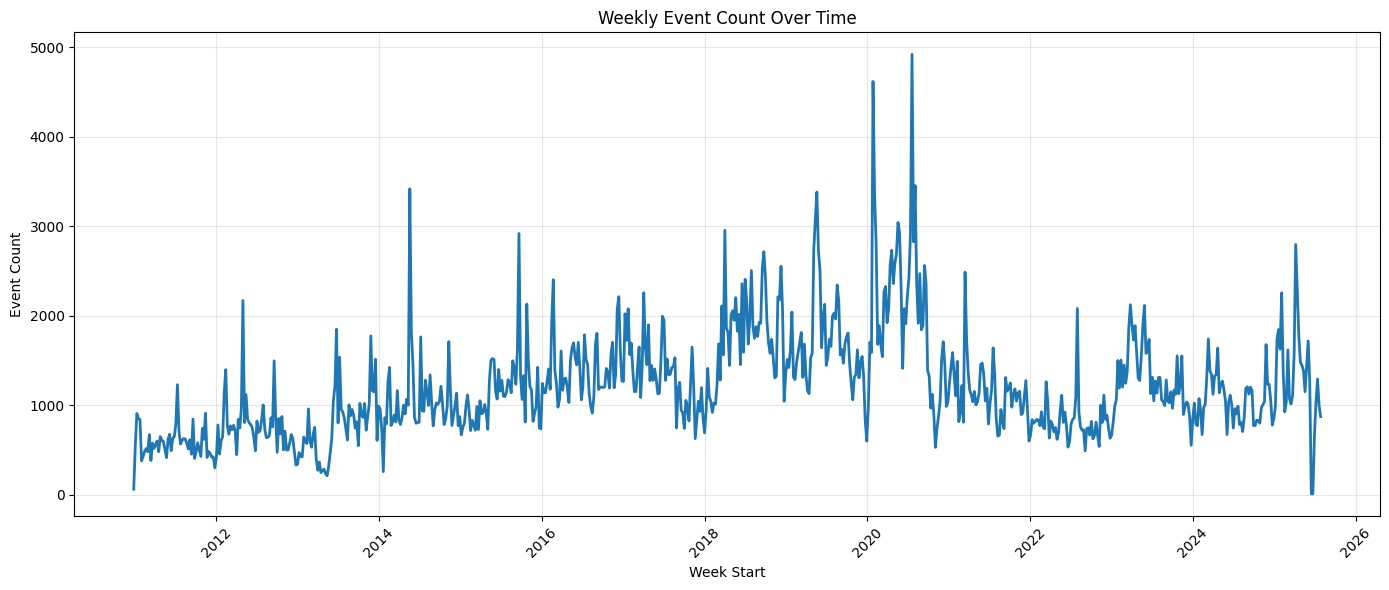

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
plt.plot(weekly_y_count['week_start'], weekly_y_count['event_count'], linewidth=2)
plt.xlabel('Week Start')
plt.ylabel('Event Count')
plt.title('Weekly Event Count Over Time')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [12]:
weekly_y_events = (
    df_y.groupby(["week_start", "event_root_text","quadclass_text", "event_text"])
        .agg({
            "GLOBALEVENTID": "count",
            "GoldsteinScale": "mean",
            "AvgTone": "mean",
            "NumMentions": "sum",
            "NumSources": "sum"
        })
        .reset_index()
        .rename(columns={"GLOBALEVENTID": "event_frequency"})
)

weekly_y_events

,week_start,event_root_text,quadclass_text,event_text,event_frequency,GoldsteinScale,AvgTone,NumMentions,NumSources
0,2010-12-27,Coerce,Material Conflict,"Arrest, detain",2,-5.0,6.000000,7,2
1,2010-12-27,Disapprove,Verbal Conflict,Accuse,1,-2.0,4.562738,2,1
2,2010-12-27,Disapprove,Verbal Conflict,Criticize or denounce,2,-2.0,5.545287,2,2
3,2010-12-27,Disapprove,Verbal Conflict,Disapprove,15,-2.0,8.517881,40,15
4,2010-12-27,Engage in Material Cooperation,Material Cooperation,Cooperate economically,5,6.4,6.707373,263,39
...,...,...,...,...,...,...,...,...,...
38548,2025-07-28,Yield,Material Cooperation,Allow international involvement,1,9.0,-1.699029,2,1
38549,2025-07-28,Yield,Material Cooperation,Ease administrative sanctions,7,5.0,-4.364527,38,7
38550,2025-07-28,Yield,Material Cooperation,Ease economic sanctions,2,7.0,0.840336,4,2
38551,2025-07-28,Yield,Material Cooperation,Return or release,9,7.0,-1.434992,70,13


In [14]:
weekly_y_events.to_csv("weekly_event.csv", index=False)

## 3. Convert event-level data into weekly level

Convert to binary Y（event/no event）but merge event by quadclass. 

Calculate event_count as additioanl features.

In [7]:
weekly_y = pd.read_csv("weekly_event.csv")

In [8]:
weekly_y = (
    weekly_y.groupby("week_start")
        .agg(
            event_count=("event_root_text", "count"),
            material_conflict=("quadclass_text", lambda x: (x=="Material Conflict").sum()),
            verbal_conflict=("quadclass_text", lambda x: (x=="Verbal Conflict").sum()),
            material_cooperation=("quadclass_text", lambda x: (x=="Material Cooperation").sum()),
        )
        .reset_index()
)

weekly_y["event_indicator"] = (weekly_y["event_count"] > 0).astype(int)

weekly_y.head()

,week_start,event_count,material_conflict,verbal_conflict,material_cooperation,event_indicator
0,2010-12-27,14,4,6,4,1
1,2011-01-03,41,16,14,11,1
2,2011-01-10,55,23,21,11,1
3,2011-01-17,44,15,16,13,1
4,2011-01-24,48,17,20,11,1


In [9]:
weekly_y.to_csv("weekly_Y.csv", index=False)